# <font color='red'>**Física Estadística Avanzada**</font>

## <font color='orange'>**Tarea Computacional #2: Quantum Monte Carlo. Partícula en un potencial armónico**</font>

## <font color='lime'>**Santiago Ruiz Piedrahita**</font>
## <font color='lime'>**Juan Sebastián Ramirez Quintero**</font>

<font color='lime'>Instituto de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Antioquia UdeA, Calle 70 No. 52-21, Medellín, Colombia.</font>

 # **Resumen**  

 En este trabajo se desarrolló un programa computacional con el propósito de estudiar el comportamiento de una partícula cuántica confinada en un potencial armónico unidimensional, utilizando el algoritmo de Monte Carlo de cadenas de Markov (Metropolis). El enfoque se centró en analizar cómo varía la distribución de probabilidad de la posición de la partícula en función de la temperatura y del número cuántico del estado. Se implementaron simulaciones numéricas que permiten contrastar la distribución cuántica obtenida con la correspondiente distribución clásica de equilibrio. Para ello, se generaron histogramas de posición que revelan la estructura de las funciones de onda cuánticas y su dependencia térmica, permitiendo observar la transición desde un comportamiento puramente cuántico a uno más clásico a medida que aumenta la temperatura. Los resultados obtenidos permiten visualizar las diferencias fundamentales entre los regímenes clásico y cuántico dentro del contexto de sistemas confinados armónicamente.

 ## **palabras claves.**

 *  Monte Carlo, Potencial armónico, Distribución de probabilidad


 # **Introducción**

 El comportamiento cuántico de una partícula confinada en un potencial armónico es un problema fundamental en la mecánica cuántica, con aplicaciones que van desde osciladores moleculares hasta circuitos cuánticos. El Hamiltoniano correspondiente en una dimensión está dado por:

\begin{equation}
    \hat{H} = \frac{\hat{p}^2}{2m} + \frac{1}{2} m\omega^2 x^2
\end{equation}

donde $\hat {p}$
es el operador momento, y su solución implica resolver la ecuación de Schrödinger independiente del tiempo. Las funciones de onda asociadas a cada nivel de energía $n$ ( $\psi_n(x)$) se expresan mediante polinomios de Hermite, permitiendo obtener la densidad de probabilidad cuántica $  \pi(x) = |\psi_n(x)|^2 $

Este trabajo utiliza el método de Monte Carlo con cadenas de Markov, específicamente el algoritmo de Metropolis, para muestrear posiciones
$x$ con distribuciones de probabilidad tanto cuánticas como clásicas. A temperatura cero, se simula el estado base de la partícula, cuya función de onda está dada por:

\begin{equation}
    \psi_0(x) = \left(\frac{1}{\pi^{1/4}}\right) ~ exp\left(-\frac{x^2}{2}\right)
\end{equation}

mientras que a temperatura finita se considera la mezcla térmica de estados excitados, ponderados por sus respectivos factores de Boltzmann.

Por otro lado, el comportamiento clásico se describe mediante la distribución

\begin{equation}
    \pi(x) \sim exp\left(\frac{-\beta x^2}{2}\right)
\end{equation}

lo que permite una comparación directa entre los dos regímenes.

A lo largo del trabajo se realizarán simulaciones para obtener histogramas de posición, los cuales se compararán con las distribuciones teóricas, permitiendo analizar la transición entre el comportamiento clásico y cuántico en función de la temperatura. Esto no solo ilustra la eficacia del algoritmo de Metropolis en sistemas físicos simples, sino que también brinda una comprensión más intuitiva de conceptos fundamentales de la mecánica estadística cuántica.

In [ ]:
#Importamos Librerias
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

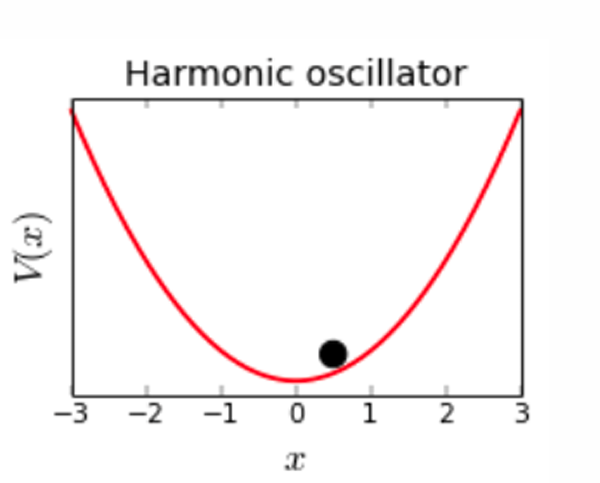

# <font color='orange'>**Partícula en un potencial armónico con $T \rightarrow 0$** </font>

Inicialmente consideremos una partícula en un potencial armónico $V(x) = \frac{x^2}{2}$ (con unidades reducidas) a muy baja temperatura, es decir, en el límite $T \rightarrow 0$.


* La probabilidad $π(x)$ de una partícula clásica en un potencial armónico a una temperatura $T = \frac{1}{β}$ está dada por: $π(x) ∼ exp(\frac{-βx^2}{2})$.

  Ahora, matemáticamente podemos ver que al tomar el límite cuando $T→ 0$ la distribución de probabilidad de una partícula se comporta como una delta de dirac respecto a la posición $x$, como se observa a continuación:

  $$
  Lim_{T→0}\pi(x)= Lim_{\beta→\infty}\pi(x) ∼  Lim_{\beta→\infty}exp(-\frac{\beta x^2}{2}) = \delta(x)  
  $$

   Es decir, la particula tiene probabilidad $1$ en $x=0$ y $0$ en otras posiciones. De esto se concluye que dicha partícula está localizada e inmovil en esta posición ($x=0$) y por tanto su energía es mínima ya que corresponde a la energía del estado base.

Por otro lado, como se ha mencionado antes la función de onda del estado base de una partícula cuántica en dicho potencial armónico es $ψ_0(x) = (\frac{1}{π^{1/4}}) exp(\frac{−x^2}{2})$, y por tanto, su probabilidad asociada está dada por $π(x) = |ψ_0(x)|^2$
En las siguientes celda de código se partio y modifico el programa dado (Markov-chain Monte Carlo Metropolis algorithm) para muestrear las posiciones $x$ con probabilidad $π(x)$. Definiendo así la función para $|ψ_0(x)|^2$ y dando como salida un histograma normalizado de las posiciones de la partícula, el cual fue comparado con la función $π(x) = |ψ0(x)|^2$ teorica conocida.


Para esto se construyo una clase constructora denominada `HarmonicOscillatorMC`, la cual se inicializa con los parámetros `delta`,`n_steps` y `x_0`, es decir, el salto máximo entre posiciones en cada iteración, el número total de iteraciones y la posición inicial respectivamente. Esta clase posee los siguientes métodos que permiten el desarrollo del histograma deseado:

* `potential`: Esta función devuelve el valor del potencial en función de la posición x.
*`wave_function`: Esta función devuelve el valor de la función onda fundamental del oscilador armónico en una posición x dada.
*`temperature`: Retorna la temperatura dado un valor de $\beta$
* `probability_density`:  Esta función calcula la densidad de probabilidad cuántica en la posición x.
*`metropolis_sampling`:  Este método realiza el muestreo de la posición de la partícula en el potencial armónico. Genera una nueva posición aleatoria en cada paso, y decide si aceptarla o no basándose en un criterio probabilistico que compara los valores de la función de onda  en la posición anterior y nueva.
*`plot_results`: Este método crea un gráfico comparando los resultados obtenidos por el muestreo de Monte Carlo con la densidad de probabilidad teórica para el oscilador armónico.

# <font color='orange'>**Solución**</font>

In [ ]:
class HarmonicOscillatorMC:
    def __init__(self, delta=0.5, n_steps=100000):
        """
        Constructor de la clase.

        Inicializa los parámetros del algoritmo de Monte Carlo:
        - delta: tamaño máximo del paso aleatorio para el muestreo.
        - n_steps: número total de pasos que se ejecutarán en el algoritmo de Metropolis-Hastings.
        """
        self.delta = delta
        self.n_steps = n_steps
        self.x = 0.0  # posición inicial de la partícula en el espacio
        self.x_samples = []  # lista donde se guardarán las posiciones muestreadas aceptadas

    def potential(self, x):
        """
        Potencial armónico: V(x) = (1/2)x^2

        Esta función devuelve el valor del potencial en función de la posición x.
        """
        return 0.5 * x**2

    def wave_function(self, x):
        """
        Función de onda fundamental del oscilador armónico.

        La función de onda ψ₀(x) se define como: ψ₀(x) = (1/π)^(1/4) * exp(-x²/2)
        Esta es la forma exacta para el estado fundamental del oscilador armónico.
        """
        return 1 / np.pi**0.25 * np.exp(-1*self.potential(x))

    def temperature(self, beta):
        """
        Relación entre la temperatura T y el parámetro β.

        La temperatura está dada por: T = 1 / β.
        """
        return 1 / beta

    def probability_density(self, x):
        """
        Densidad de probabilidad: π(x) = |ψ₀(x)|²

        Esta función calcula la densidad de probabilidad cuántica en la posición x.
        Utiliza el cuadrado del valor absoluto de la función de onda fundamental.
        """
        return abs(self.wave_function(x))**2

    def metropolis_sampling(self):
        """
        Algoritmo de muestreo de Metropolis-Hastings para Monte Carlo.

        Este método realiza el muestreo de la posición de la partícula en el potencial armónico.
        Genera una nueva posición aleatoria en cada paso, y decide si aceptarla o no
        basándose en un criterio probabilistico que compara los valores de la función de onda  en la posición anterior y nueva.
        """
        x = self.x  # inicializamos la posición en el punto inicial
        for _ in range(self.n_steps):
            # Proponer un nuevo valor en el intervalo [x - delta, x + delta]
            x_new = x + random.uniform(-self.delta, self.delta)

            # Aceptación con probabilidad min(1, π(x_new)/π(x)), según el algoritmo de Metropolis
            if random.uniform(0.0, 1.0) < self.probability_density(x_new) / self.probability_density(x):
                x = x_new  # aceptamos el nuevo valor de la posición

            # Guardamos la posición actual, aceptada o no
            self.x_samples.append(x)

    def plot_results(self):
        """
        Genera el histograma de los valores muestreados y la función de probabilidad teórica.

        Este método crea un gráfico comparando los resultados obtenidos por el muestreo
        de Monte Carlo con la densidad de probabilidad teórica para el oscilador armónico.
        """
        # Crear el histograma de las posiciones muestreadas
        plt.hist(self.x_samples, bins=100, density=True, color='b', edgecolor='black', label='MCMM')

        # Generar los valores de x para graficar la función teórica
        x_vals = np.linspace(-4, 4, 1000)
        plt.plot(x_vals, self.probability_density(x_vals), label='Teórico ajustado', linewidth=3, color='crimson')

        # Etiquetas y título del gráfico
        plt.xlabel('$x$')
        plt.ylabel('$\pi(x) = |ψ_0(x)|^2$')
        plt.title('Densidad de probabilidad para una partícula a $T \\rightarrow 0$ K')
        plt.legend()
        plt.show()

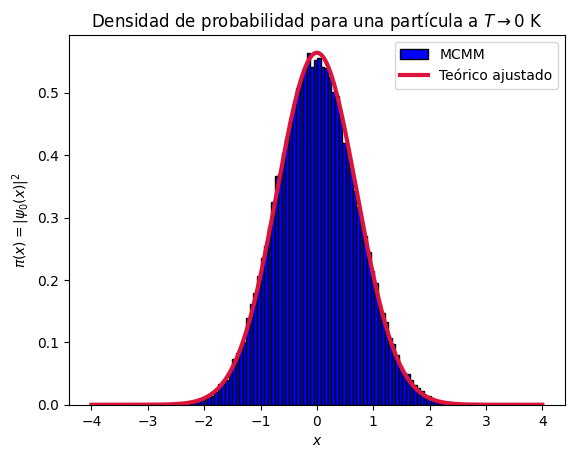

In [ ]:
# Crear una instancia de la clase
simulation = HarmonicOscillatorMC(delta=0.5, n_steps=100000)

# Ejecutar el muestreo de Monte Carlo
simulation.metropolis_sampling()

# Graficar los resultados obtenidos
simulation.plot_results()

En los resultados obtenidos a partir del programa construido se aprecia que efectivamente la distribución densidad de la partícula a $T→ 0$ concuerda con una distribución normal acorde con lo esperado teóricamente $\rho(x,x,\beta)= |\psi_0(x)|^2$. Donde, este comportamiento es consistente con el principio de mínima energía, según el cual, a temperaturas muy bajas, el sistema tiende a ocupar preferencialmente el estado de menor energía disponible.

# <font color='orange'> **Partícula en un potencial armónico a temperatura finita.** </font>

En este caso, la probabilidad para dicha partícula cuántica de estar en un estado $n$ y una posición $x$ es:

$$π(n, x) ∝ |ψ_n(x)|^2~exp(−βE_n)$$

con $E_n = n + \frac{1}{2}$ y las funciones de onda $ψ_n(x)$ se pueden obtener de manera recursiva con base en los polinomios de Hermite:


Para el estudio del efecto de considerar temperatura finita, se modifico la clase creada anteriormente para simular un oscilador armónico a temperatura finita $T = \frac{1}{β}$. Para ello, se consideraron transiciones en  primer lugar desde $(n, x)$ a $(n, x')$ con una probabilidad de aceptacion de Metropolis dada por:

  $p(x \rightarrow x') = min(1, |\frac{ψ_n(x')}{ψ_n(x)}|^2)$ </font>

Adicional a esto se añadieron transiciones entre niveles de energía del tipo $n \rightarrow m = n±1$ manteniendo $x$ fijo con probabilidad dada por:

  $p(n \rightarrow m) = min(1, |\frac{ψ_m(x)}{ψ_n(x)}|^2~exp(−β\Delta E))$ </font>

y teniendo en cuenta que transiciones con $m < 0$ son propuestas pero siempre rechazadas.

Para esto se construyo una clase constructora denominada `QuantumHarmonicOscillator`, la cual se inicializa con los parámetros `delta`,`n_steps` y `beta_x`, es decir, el salto máximo entre posiciones en cada iteración, el número total de iteraciones y el inverso de la temperatura a considerar. Esta clase posee los siguientes métodos que permiten el desarrollo del estudio deseado:

* `ground_state_wavefunction`: Función de onda del estado base del oscilador armónico.
*`wave_function`: Función de onda del oscilador armónico para el estado n usando recurrencia.
*`energy`: Retorna la energía del estado n del oscilador armónico.
* `quantum_probability`:  Esta función calcula la distribución de probabilidad cuántica teorica en una posicion x.
*`classical_probability`: Esta función calcula la distribución de probabilidad clásica (aproximación a alta temperatura) en una posición x.
*`run_metropolis_mcmc`:  Ejecuta el algoritmo de Metropolis MCMC para muestrear posiciones y niveles de energía del oscilador armónico cuántico.
*`plot_results`:  Genera gráficos comparativos entre la distribución obtenida por MCMC y las distribuciones teóricas cuántica y clásica para el valor de β definido en la instancia.

La codificación de esta clase se aprecia a continuación:


In [ ]:
class QuantumHarmonicOscillator:
    def __init__(self, beta_x, delta=0.5, n_steps=100000):
        """
        Inicializa el oscilador armónico cuántico.

        Parámetros:
        - beta_x: inversa de la temperatura (1/kT).
        - delta: tamaño del paso propuesto en x (para MCMC).
        - n_steps: número de pasos para la simulación Monte Carlo.
        """
        self.beta_x = beta_x
        self.delta = delta
        self.n_steps = n_steps

    def ground_state_wavefunction(self, x):
        """
        Función de onda del estado base del oscilador armónico.

        Parámetros:
        - x: posición.

        Retorna:
        - Valor de la función de onda del estado base en x.
        """
        return np.exp(-x**2 / 2.0) / np.pi**0.25

    def wavefunction(self, x, n_state):
        """
        Función de onda del oscilador armónico para el estado n usando recurrencia.

        Parámetros:
        - x: posición.
        - n_state: número cuántico del estado deseado.

        Retorna:
        - Valor de la función de onda para el estado n en x.
        """
        psi_ = [self.ground_state_wavefunction(x)]  # Estado base
        psi_.append(np.sqrt(2.0) * x * psi_[0])  # Primer estado excitado
        for n in range(2, n_state + 1):  # Estados excitados superiores usando recurrencia
            psi_.append(np.sqrt(2.0/n) * x * psi_[n-1] - np.sqrt((n-1.0)/n) * psi_[n-2])
        return psi_[n_state]

    def energy(self, n):
        """
        Energía del estado n del oscilador armónico.

        Parámetros:
        - n: número cuántico.

        Retorna:
        - Energía del estado n.
        """
        return n + 0.5  # Fórmula de energía en unidades naturales

    def quantum_probability(self, x):
        """
        Distribución de probabilidad cuántica exacta.

        Parámetros:
        - x: posición.

        Retorna:
        - Valor de la distribución de probabilidad cuántica en x.
        """
        return np.sqrt(np.tanh(0.5 * self.beta_x) / np.pi) * np.exp(-x**2 * np.tanh(0.5 * self.beta_x))

    def classical_probability(self, x):
        """
        Distribución de probabilidad clásica (aproximación a alta temperatura).

        Parámetros:
        - x: posición.

        Retorna:
        - Valor de la distribución de probabilidad clásica en x.
        """
        return np.sqrt(self.beta_x / (2 * np.pi)) * np.exp(-0.5 * x**2 * self.beta_x)

    def run_metropolis_mcmc(self):
        """
        Ejecuta el algoritmo de Metropolis MCMC para muestrear posiciones y niveles de energía
        del oscilador armónico cuántico.

        Retorna:
        - Una lista de pares [x, n]:
            x: posición aceptada.
            n: estado cuántico correspondiente.
        """
        x = 0.0  # Posición inicial
        n = 0    # Estado cuántico inicial
        samples = []  # Lista para almacenar los pares [x, n]

        for _ in range(self.n_steps):
            # Proponer nuevo valor de x
            x_new = x + random.uniform(-self.delta, self.delta)

            # Aceptar nuevo x con probabilidad basada en el cociente de funciones de onda
            if random.uniform(0.0, 1.0) < min(1, abs(self.wavefunction(x_new, n) / self.wavefunction(x, n))**2):
                x = x_new

            # Proponer un cambio de nivel de energía n → n ± 1
            n_new = n + (-1)**random.randint(0, 1)
            if n_new >= 0:
                E_new = self.energy(n_new)
                E_old = self.energy(n)
                prob = abs(self.wavefunction(x, n_new) / self.wavefunction(x, n))**2 * np.exp(-self.beta_x * (E_new - E_old))

                # Aceptar el nuevo estado con cierta probabilidad
                if random.uniform(0.0, 1.0) < min(1, prob):
                    n = n_new

            # Guardar la muestra actual [x, n]
            samples.append([x, n])

        return samples

    def plot_distributions(self):
        """
        Genera gráficos comparativos entre la distribución obtenida por MCMC y
        las distribuciones teóricas cuántica y clásica para el valor de β
        definido en la instancia.
        """
        # Ejecutamos el algoritmo de MCMC
        x_n_dist = self.run_metropolis_mcmc()
        x_n_dist = np.array(x_n_dist)

        # Separamos niveles de energía y posiciones
        energy_levels = x_n_dist[:, 1]
        positions = x_n_dist[:, 0]

        # Creamos la figura con dos subgráficos
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))

        # Histograma de posiciones
        ax[0].hist(positions, bins=100, density=True, color='b', alpha=0.5,
                  edgecolor='black', label='MCMC')

        # Histograma de niveles de energía
        ax[1].hist(energy_levels, bins=np.arange(min(energy_levels)-0.5, max(energy_levels)+1.5, 1),
                  density=True, edgecolor='black', color='b', alpha=0.5, label='MCMC')

        # Rango de valores de x para graficar funciones teóricas
        x_vals = np.linspace(min(positions), max(positions), 1000)

        # Calculamos la distribución clásica y cuántica
        classical = self.classical_probability(x_vals)
        quantum = self.quantum_probability(x_vals)

        # Graficamos las distribuciones teóricas
        ax[0].plot(x_vals, classical, color='black', lw=4, label='Clásica')
        ax[0].plot(x_vals, quantum, color='red', lw=4, label='Cuántica')

        # Títulos y etiquetas de los subgráficos
        ax[0].set_title('Posiciones')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel(r'$\pi(x)$')

        ax[1].set_title('Energías')
        ax[1].set_xlabel('$n$')
        ax[1].set_ylabel(r'$\pi(n)$')

        # Añadir leyenda y título general
        ax[0].legend()
        fig.suptitle(f'Distribuciones con T = {1/self.beta_x:.2f}, donde β = {self.beta_x}')

        # Ajustar el diseño y mostrar
        plt.tight_layout()
        plt.show()

**Nota:**
* Para la construcción de los estados exitados se uso la recurrencia establecida para los polinomios de Hermite:

$$
H_{n+1}=2xH_n(x)-2nH_{n-1}(x)
$$

$$
H_1(x)= 2xH_0(x)
$$


En los histogramas que se generaran a continuación se aprecia la comparación con la distribucion de probabilidad cuántica exacta $π_{quant}(x) = ρ(x, x, β)/Z$ dada por la expresion:

  $π_{quant}(x) = \sqrt{\frac{tanh(β/2)}{π}}~ exp[−x^2~tanh(β/2)]$ </font>

Cuya demostración se aprecia a continuación.

**Demostración $π_{quant}(x)$:**

Para esta demostración se puede partir del ejercicio $4$ del taller, en el cual se demostro partiendo de la formula  de Trotter para el caso del oscilador armónico.

$$
\rho(x,x',\beta)=\frac{1}{\sqrt{2\pi\beta}}exp[-\frac{\beta x^2}{4}-\frac{(x-x')^2}{2\beta}-\frac{\beta x'^2}{4}]
$$
y haciendo uso del método de convolución, que esta densidad se puede escribir finalmente como:

$$
\rho(x,x',\beta)=\frac{1}{\sqrt{2\pi sinh(\beta)}}exp[-\frac{tanh(\beta/2) (x+x')^2}{4}-\frac{coth(\beta/2)(x-x')^2}{4}]
$$

permitiendo así escribir la densidad final como:

$$
\rho(x,x,\beta)=\frac{1}{\sqrt{2\pi sinh(\beta)}}exp[-tanh(\beta/2) x^2]
$$

y ya que:

$$
Z(\beta)= \int_{-\infty}^{\infty} \rho(x,x,\beta) dx= \frac{1}{2sinh(\beta/2)}
$$

Podemos definir hallar así que:

$$
\pi_{quant}(x) = \rho(x,x,\beta)/Z(\beta)= \frac{\frac{1}{\sqrt{2\pi sinh(\beta)}}exp[-tanh(\beta/2) x^2]}{\frac{1}{2sinh(\beta/2)}}
$$
$$
= \frac{2sinh(\beta/2)}{\sqrt{4\pi sinh(\beta/2)cosh(\beta/2)}}exp[-tanh(\beta/2) x^2]
$$
$$
= \sqrt{tanh(\beta/2)/\pi } \space exp[-x^2tanh(\beta/2) ]
$$

Por otro lado, también se icnluye en el histograma la gráfica de la distribución de probabilidad clásica exacta, dada por:

   $π_{class}(x) =\sqrt{\frac{β}{(2π)}}~exp(\frac{−βx^2}{2})$ </font>

La cual se demuestra a continuación.

**Demostración $π_{class}(x)$:**

Como sabemos  en el caso de una particula clásica la energía del osciladopr armónico clásico esta dado por:

$$
E(x,p)=\frac{p^2}{2m}+\frac{1}{2}m\omega^2x^2
$$

y por tanto en el ensamble canónico, la probabilidad de encontrar el sistema en un estado de energía $E(x,p)$ esta dado por:

$$
P(x,p)=\frac{e^{-\beta E(x,p)}}{Z}= \frac{e^{-\beta [\frac{p^2}{2m}+\frac{1}{2}m\omega^2x^2]}}{Z}
$$

Ahora integremos sobre $p$, obteniendo:


$$
π_{class}(x) = \int_{-\infty}^{\infty}P(x,p)dp= \frac{e^{-\frac{1}{2}\beta m\omega^2x^2}}{Z} \sqrt{2\pi m/\beta}
$$

Ahora, tomando $m=\omega=1$ (unidades normalizadas) y ya que:
$$
\int_{-\infty}^{\infty} π_{class}(x) dx= 1= \sqrt{2\pi/\beta} \int_{-\infty}^{\infty} \frac{e^{-\frac{1}{2}\beta x^2}}{Z} dx  = \sqrt{2\pi/\beta}  \sqrt{2\pi/\beta}
$$
Por tanto:
$$
Z(\beta)= 2\pi/\beta
$$
y así se llega finalmente a que:

$$
π_{class}(x) = \frac{e^{-\frac{1}{2}\beta x^2}}{2\pi/\beta} \sqrt{ \beta/2\pi} = \sqrt{ \beta/(2\pi)} \space e^{-\frac{1}{2}\beta x^2}
$$



En la celda de código a continuación se aprecia la creación de los histogramas normalizados de las posiciones de la partícula a las temperaturas inversas $β = 0.2$, $β = 1$ y $β = 5$. Para lo cual se instancia la clase construida y se hace uso del método `plot_distributions` correspondiente.

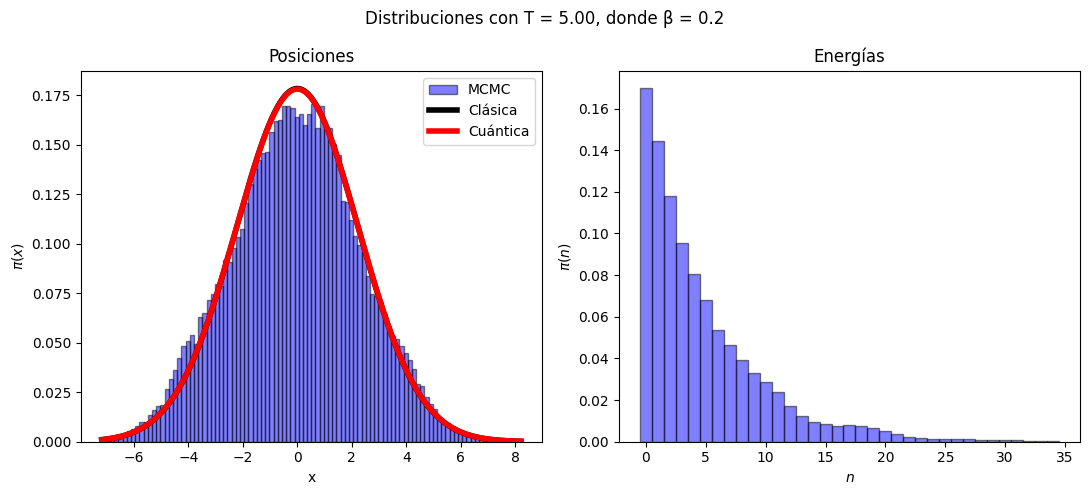

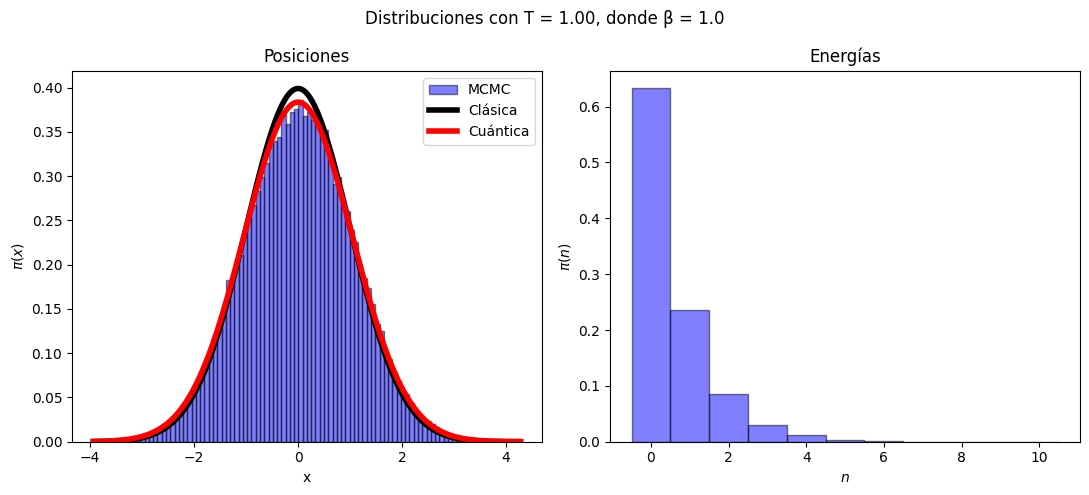

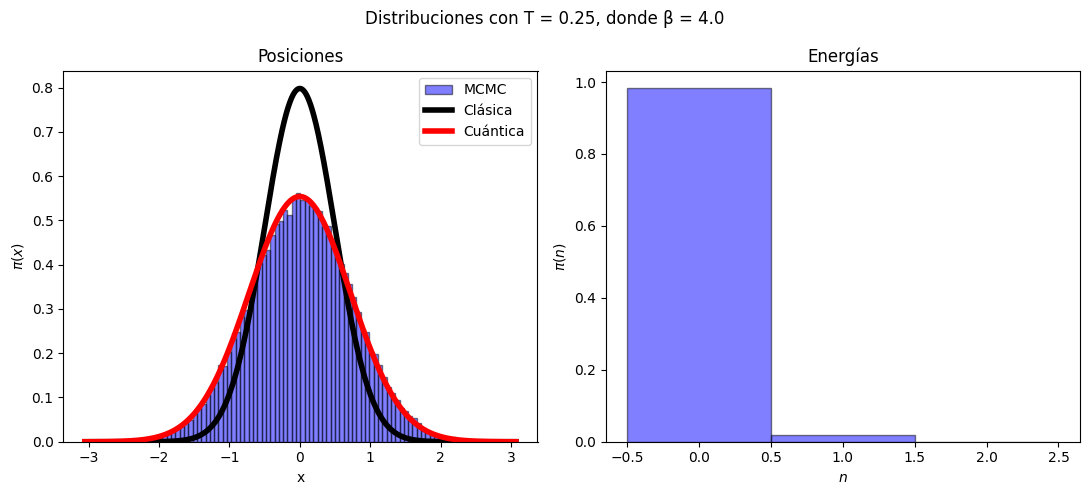

In [ ]:
beta_values = [0.2 , 1.0 , 4.0]
# Instanciamos las clases para los valores de beta a estudiar
qho_ = QuantumHarmonicOscillator(beta_x=beta_values[0])
qho_2 = QuantumHarmonicOscillator(beta_x=beta_values[1])
qho_3 = QuantumHarmonicOscillator(beta_x=beta_values[2])

# Ejecutamos y graficamos las distribuciones de posición y energía
qho_.plot_distributions()
qho_2.plot_distributions()
qho_3.plot_distributions()


Los resultados muestran una excelente concordancia entre los histogramas simulados y las distribuciones cuánticas teóricas. Para
$𝛽 =5 $ (temperatura baja), el sistema se encuentra mayoritariamente en el estado fundamental, por lo que el histograma coincide prácticamente con la distribución del estado base $ |\psi_0(x)|^2$. A medida que disminuye
$𝛽$ (es decir, aumenta la temperatura), el sistema comienza a explorar estados excitados y la forma de la distribución se ensancha, tal como predicen las expresiones analíticas.

En el caso de  $𝛽 = 1$, se observa una mezcla notable entre varios niveles energéticos. El histograma mantiene una forma gaussiana, pero con una anchura mayor en comparación con el caso a temperatura baja. Finalmente, para
$ 𝛽 = 0.2$ (alta temperatura), la distribución tiende hacia la forma clásica, dominada por la función $exp(\frac{-\beta x^2}{2})$, lo que evidencia una transición desde un comportamiento cuántico dominado por la cuantización de niveles hacia un régimen clásico de equilibrio térmico.

Este análisis confirma que el algoritmo implementado reproduce correctamente tanto los efectos cuánticos como la transición hacia el límite clásico al aumentar la temperatura, validando su utilidad como herramienta de simulación en sistemas estadísticos cuánticos.

Por otro lado, notemos que es posible ajustar la temperatura del baño térmico para favorecer la ocupación de un nivel de energía excitado específico, aunque con ciertas limitaciones inherentes a la naturaleza estadística del sistema cuántico. En un oscilador armónico cuántico, la probabilidad de que la partícula se encuentre en un estado $ n $ a temperatura finita está dada por:

$$
P_n \propto \exp(-\beta E_n), \quad \text{con } E_n = \left(n + \frac{1}{2}\right).
$$

Esto implica que al disminuir la temperatura (es decir, al aumentar $ \beta $), los estados de energía más bajos se vuelven más probables, mientras que los estados más excitados se suprimen exponencialmente. Sin embargo, para valores intermedios de $ \beta $, se puede observar una mayor recurrencia relativa de ciertos niveles excitados, especialmente si se elige una temperatura tal que el peso de Boltzmann $ \exp(-\beta E_n) $ tenga un valor comparable al de los niveles cercanos.

Por tanto, no se puede forzar una ocupación exclusiva de un nivel excitado, pero sí se puede encontrar una ventana de temperatura en la cual ese nivel tenga una mayor probabilidad relativa frente a otros niveles cercanos. Este fenómeno puede aprovecharse para "sintonizar" el sistema térmico y estudiar con mayor resolución el comportamiento estadístico de estados excitados específicos.


Ahora si analizamos la distribución del histograma de energía podemos observar que  el ancho  está directamente relacionado con la dispersión de los estados energéticos que la partícula puede ocupar a una temperatura dada.

A bajas temperaturas (valores altos de $ \beta $), la distribución de energías se concentra alrededor del estado fundamental. Esto se refleja en un histograma angosto y una FWHM pequeña, ya que el sistema accede principalmente al nivel $ n = 0 $ debido a que los niveles excitados son fuertemente penalizados por el factor de Boltzmann.

Por el contrario, al aumentar la temperatura (disminuir $ \beta $), se incrementa la probabilidad de ocupación de estados excitados, lo que ensancha la distribución de energías y, en consecuencia, su FWHM. Esta tendencia se puede entender a partir de la distribución de probabilidad.

Esto implica que la FWHM crece con la temperatura, ya que un mayor número de estados $ n $ contribuye de manera significativa a la estadística del sistema. Esta evolución es evidente al observar los histogramas de energía obtenidos para distintos valores de $\beta $:


* Para $ \beta = 5 $, el histograma está fuertemente concentrado en el estado base.
* Para $ \beta = 1 $, se observa una distribución más dispersa, con una mezcla apreciable de varios niveles excitados.
* Para $ \beta = 0.2 $, la distribución se extiende ampliamente, reflejando un régimen altamente térmico donde múltiples niveles están ocupados con probabilidades similares.


Este análisis demuestra que la FWHM actúa como un buen indicador de la "actividad térmica" del sistema y permite estudiar la transición entre el régimen cuántico y el clásico a través del ensanchamiento de la distribución de energía.


A partir de los histogramas obtenidos en las distintas simulaciones, se pueden extraer varias conclusiones importantes sobre el comportamiento estadístico y cuántico del sistema:


* A temperatura cero $ T \to 0 $, o $ \beta \to \infty $, el histograma de posiciones coincide con la densidad de probabilidad del estado fundamental, mostrando una distribución gaussiana centrada en $ x = 0 $. Esto valida tanto la formulación teórica del oscilador armónico cuántico como la correcta implementación del algoritmo de Metropolis.

* A temperatura finita, los histogramas de posición muestran un ensanchamiento progresivo a medida que disminuye $ \beta $, indicando que el sistema comienza a poblar niveles excitados. Esta evolución se refleja también en los histogramas de energía, que se vuelven más anchos y distribuidos sobre varios niveles, lo que es consistente con el principio de distribución de Boltzmann.

* Se observa una transición gradual desde un comportamiento cuántico dominante, con ocupación del estado fundamental, hacia un régimen clásico donde la distribución de posiciones y energías se asemeja a las funciones gaussianas derivadas de la estadística clásica. Este cruce de regímenes es especialmente visible al comparar los histogramas simulados con las distribuciones teóricas exactas.

* Finalmente, los histogramas proporcionan una representación intuitiva y visual del equilibrio térmico en sistemas cuánticos, permitiendo estudiar no solo la forma funcional de las distribuciones, sino también cómo la temperatura afecta la estructura probabilística del sistema.



Por último estudiemos que ocurre si modificamos el poso a estudiar, por ejemplo si ahora consideramos el problema de un pozo cuántico infinito de potencial con baño térmico, en lugar de un oscilador armónico.

Para esto se procede a modificar la clase construida en el estudio anterior buscando solucionar el problema de un pozo cuántico infinito de potencial con baño térmico, en lugar de un oscilador armónico.

Para esto se debe tener en cuenta que la función de onda en un pozo infinito de potencial unidimensional de ancho $L$ y con condiciones de frontera $\psi(0)=\psi(L)=0$ esta dada por la siguiente expresión:

$$
\psi_n(x)=\sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L})
$$

donde los autovalores de energía o valores de energía discreta posibles estan dados por:

$$
E_n=\frac{n^2\pi^2\hbar^2}{2mL^2}
$$
Para este caso tomaremos por simplicidad unidades normalizadas, es decir $m=\hbar=1$.

Por otro lado, para el calculo de la distribucion de probabilidad teorica ,como se ha discutido anteriormente, esta dada por:

$$
\pi(x)= \frac{1}{Z}\sum_{n=1}^{\infty} e^{-\beta E_n} |\psi_n(x)|^2
$$

Donde $Z$ es la función de partición canónica para un recerborio termico y viene dada teoricamente por la expresión:

$$
Z=\sum_{n=1}^{\infty}e^{-\beta E_n}= \sum_{n=1}^{\infty}e^{-\beta\frac{\pi^2n^2}{2L^2}}
$$


En la siguiente celda de código  se aprecia la clase constructora denominada `InfinitePotentialWell` por su nombre en inglés, correspondiente al caso de poso infinito de potencial considerado, partiendo de un $\beta$ dado ($\beta=\frac{1}{T}$). Entre sus métodos más importantes estan:

*  `wavefunction`:  nos permite construir la función de onda en el estado de energía $n$ requerido

* `energy`: dado un nivel $n$ retorna el autovalor de energía de este nivel.

* `theoretical_probability_distribution`: Permite construir teoricamente la función de distribución de probabilidad la cual es usada en el gráfico comparativo.

* `run_metropolis_mcmc`: ejecuta la evolución del sistema en la cantidad de pasos indicados (`n_steps).

* `plot_distributions`: Gráfica el histograma de posiciones y de energía encontrados para la temperatura dada.


In [ ]:
class InfinitePotentialWell:
    def __init__(self, beta_x, L=1.0, delta=0.05, n_steps=100000, max_state=20):
        self.beta_x = beta_x
        self.L = L
        self.delta = delta
        self.n_steps = n_steps
        self.max_state = max_state  # Número máximo de estados para suma teórica

    def wavefunction(self, x, n):
        if 0 < x < self.L:
            return np.sqrt(2 / self.L) * np.sin(n * np.pi * x / self.L)
        else:
            return 0.0

    def energy(self, n):
        return (n * np.pi / self.L)**2 / 2

    def partition_function(self,max_state):
      return sum(np.exp(-self.beta_x * self.energy(n)) for n in range(1, max_state + 1))

    def theoretical_probability_distribution(self, x_vals):
        Z = self.partition_function(self.max_state)
        pi_x = np.zeros_like(x_vals)

        for n in range(1, self.max_state + 1):
            E_n = self.energy(n)
            psi_n_sq = np.array([self.wavefunction(x, n)**2 for x in x_vals])
            pi_x += np.exp(-self.beta_x * E_n) * psi_n_sq

        return pi_x / Z

    def run_metropolis_mcmc(self):
        x = self.L / 2
        n = 1
        samples = []

        for _ in range(self.n_steps):
            x_new = x + random.uniform(-self.delta, self.delta)
            if 0 < x_new < self.L:
                ratio = abs(self.wavefunction(x_new, n) / self.wavefunction(x, n))**2
                if random.uniform(0.0, 1.0) < min(1, ratio):
                    x = x_new

            n_new = n + (-1)**random.randint(0, 1)
            if n_new >= 1:
                E_old, E_new = self.energy(n), self.energy(n_new)
                psi_ratio = abs(self.wavefunction(x, n_new) / self.wavefunction(x, n))**2
                prob = psi_ratio * np.exp(-self.beta_x * (E_new - E_old))
                if random.uniform(0.0, 1.0) < min(1, prob):
                    n = n_new

            samples.append([x, n])

        return samples

    def plot_partition_convergence(self, max_states=100):
        """
        Grafica la convergencia de la función de partición Z en función del número de estados incluidos.

        Parámetros:
        - max_states: número máximo de estados considerados para mostrar convergencia.
        """
        Z_vals = []
        for N in range(1, max_states + 1):
            Z_N = self.partition_function(N)
            Z_vals.append(Z_N)

        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_states + 1), Z_vals, marker='o', lw=2)
        plt.xlabel("Número de estados incluidos (n)")
        plt.ylabel("Función de partición acumulada $Z_n$")
        plt.title(f"Convergencia de $Z$ con β = {self.beta_x}, L = {self.L}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_distributions(self):
        data = np.array(self.run_metropolis_mcmc())
        positions, levels = data[:, 0], data[:, 1]

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        # Histograma MCMC de posiciones
        ax[0].hist(positions, bins=100, density=True, alpha=0.5, color='blue', edgecolor='black', label='MCMC')

        # Distribución teórica
        x_vals = np.linspace(0, self.L, 1000)
        pi_x = self.theoretical_probability_distribution(x_vals)
        ax[0].plot(x_vals, pi_x, color='red', lw=2.5, label='Teórica')

        ax[0].set_title('Distribución de Posiciones')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel(r'$\pi(x)$')
        ax[0].legend()

        # Histograma de niveles de energía
        ax[1].hist(levels, bins=np.arange(0.5, max(levels)+1.5), density=True, alpha=0.6, color='green', edgecolor='black')
        ax[1].set_title('Distribución de Energías')
        ax[1].set_xlabel('n')
        ax[1].set_ylabel(r'$\pi(n)$')

        plt.suptitle(f'Distribuciones MCMC vs. Teórica (Pozo Infinito) con β = {self.beta_x}, L = {self.L}')
        plt.tight_layout()
        plt.show()


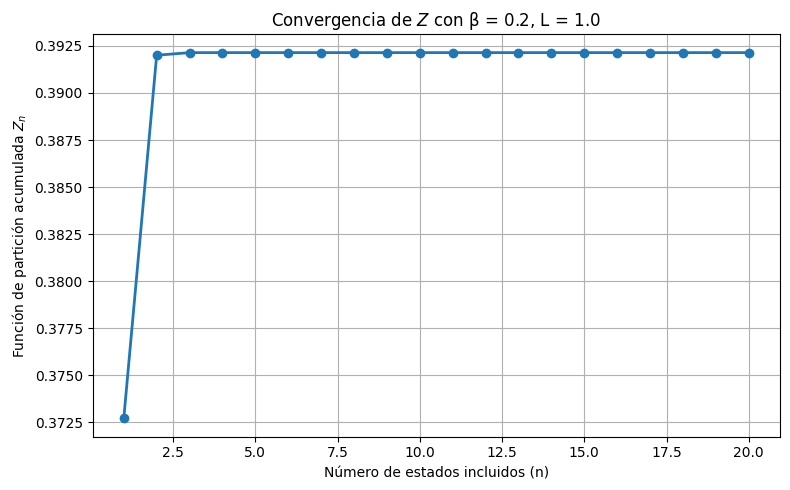

In [ ]:
model = InfinitePotentialWell(beta_x=0.2, L=1.0, delta=0.5, n_steps=100000)
model.plot_partition_convergence(max_states=20)

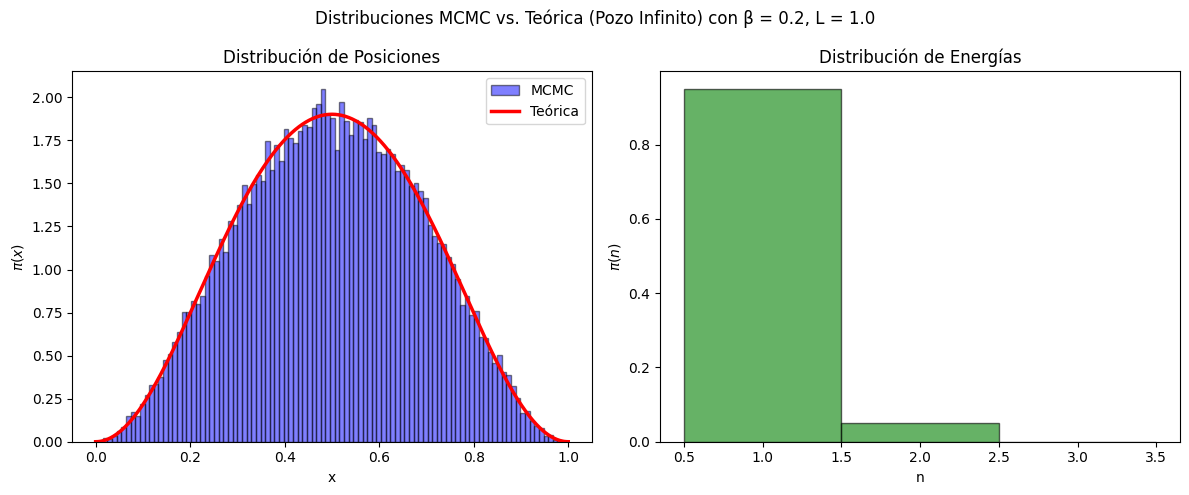

In [ ]:
model.plot_distributions()

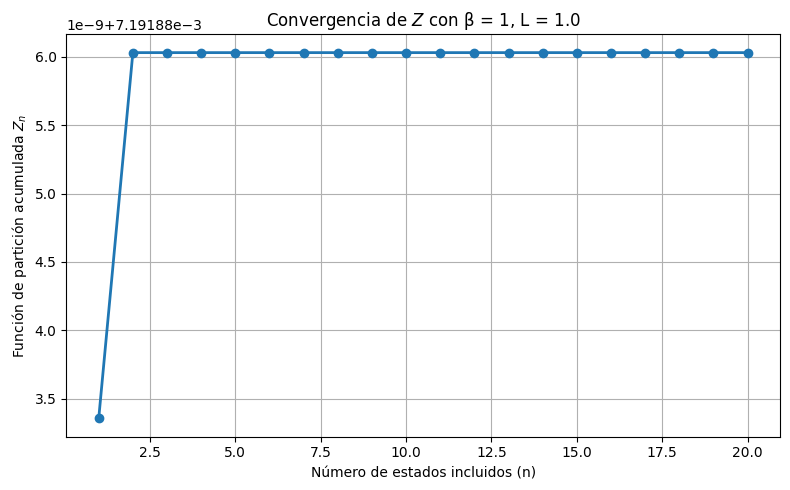

In [ ]:
model2 = InfinitePotentialWell(beta_x=1, L=1.0, delta=0.5, n_steps=100000)
model2.plot_partition_convergence(max_states=20)

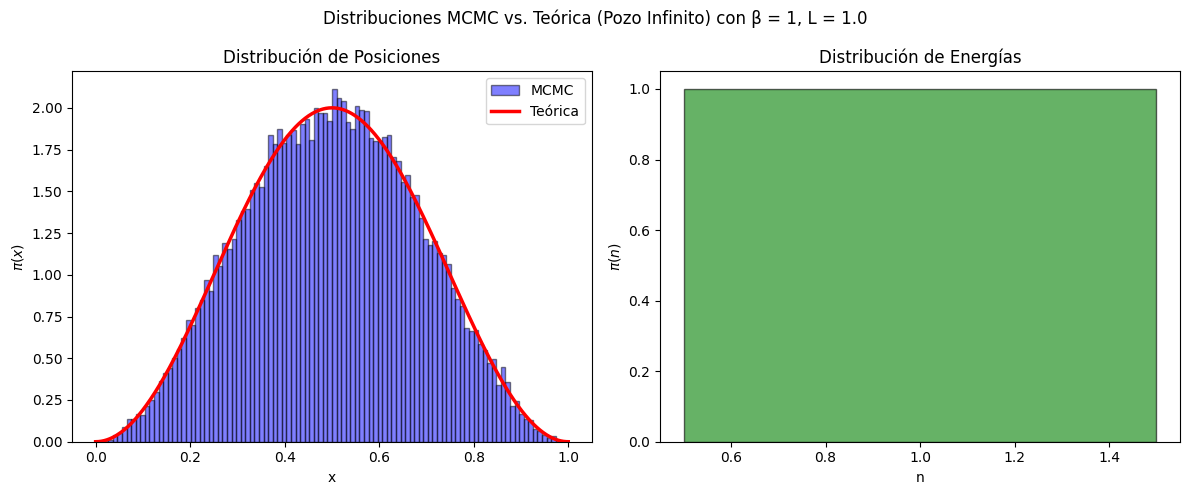

In [ ]:
model2.plot_distributions()

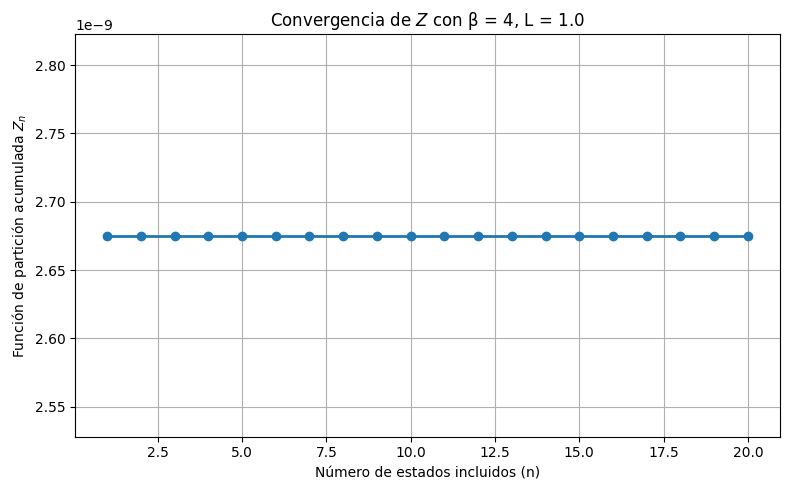

In [ ]:
model2 = InfinitePotentialWell(beta_x=4, L=1.0, delta=0.5, n_steps=100000)
model2.plot_partition_convergence(max_states=20)

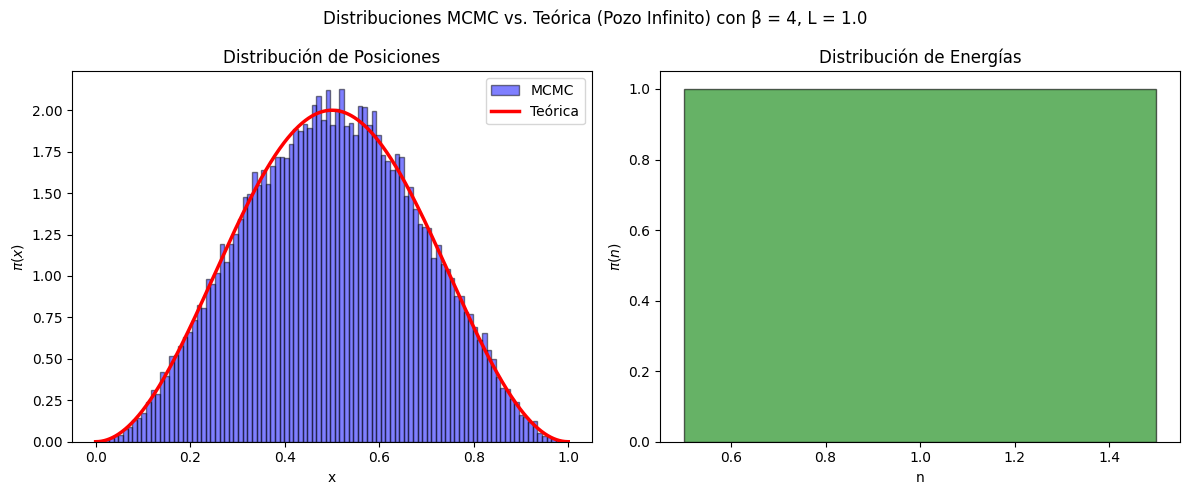

In [ ]:
model2.plot_distributions()

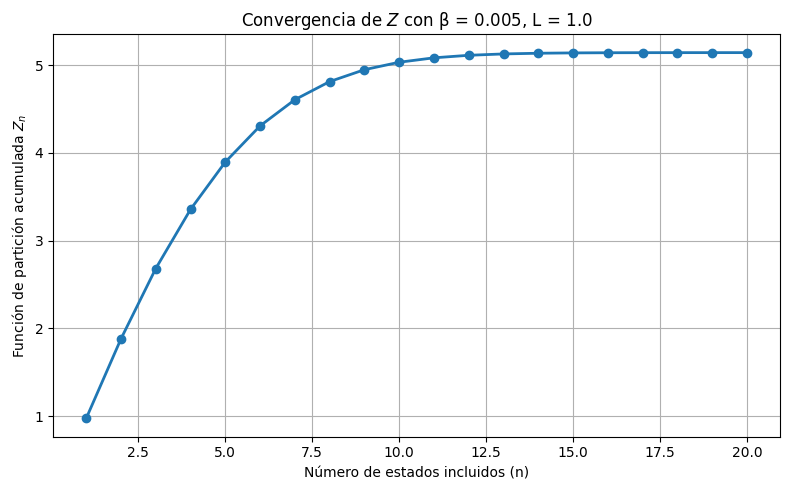

In [ ]:
model3 = InfinitePotentialWell(beta_x=0.005, L=1.0, delta=0.5, n_steps=100000)
model3.plot_partition_convergence(max_states=20)

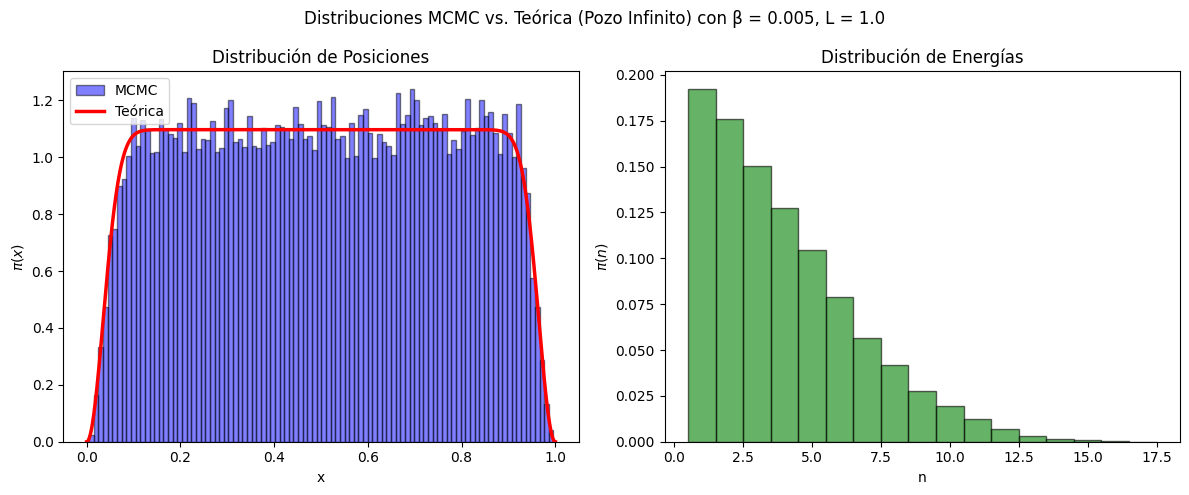

In [ ]:
model3.plot_distributions()

Al sustituir el potencial armónico por un pozo cuántico infinito, el comportamiento térmico del sistema cambia notablemente debido a la diferente estructura del espectro energético. En el pozo, los niveles están dados por $ E_n \propto n^2 $, lo que provoca que a temperaturas altas se acceda más fácilmente a estados muy excitados, aumentando significativamente la dispersión energética.

Los histogramas de posición en el pozo reflejan la forma oscilatoria de las funciones de onda $ \psi_n(x) \sim \sin\left(\frac{n\pi x}{L}\right) $, presentando nodos fijos en los bordes del intervalo y estructuras más marcadas que en el caso armónico, donde predominan formas gaussianas suaves.

En conjunto, el sistema en el pozo cuántico muestra una mayor sensibilidad térmica y distribuciones de probabilidad más estructuradas, lo que contrasta con el comportamiento más regular y centrado del oscilador armónico. Esta comparación destaca cómo el tipo de potencial determina la respuesta térmica y estadística del sistema.

# Conclusiones

En este trabajo se aplicó con éxito el método Monte Carlo de Metropolis para analizar sistemas cuánticos confinados, específicamente una partícula en un potencial armónico y en un pozo infinito. Las simulaciones permitieron reproducir con fidelidad las distribuciones de probabilidad tanto en el régimen cuántico como en el clásico, evidenciando cómo la temperatura afecta la dinámica del sistema.

Para el oscilador armónico, los resultados mostraron una correspondencia exacta entre la distribución a temperatura cero y el estado fundamental esperado, mientras que al aumentar la temperatura, la distribución se aproximó progresivamente a un comportamiento clásico. En el caso del pozo infinito, las simulaciones reflejaron la complejidad adicional introducida por el potencial, destacando la sensibilidad térmica y la aparición de patrones estructurales en las distribuciones de posición y energía.

Estos hallazgos resaltan la utilidad del método Monte Carlo para capturar aspectos relevantes de sistemas cuánticos estadísticos y aportan una visión detallada sobre el impacto de los efectos térmicos en partículas confinadas, fortaleciendo su aplicabilidad en el estudio de fenómenos cuánticos en diferentes potenciales.

# Agradecimientos

Se agradece al profesor Johans y al Instituto de Física por las herramientas conceptuales y computacionales brindadas para el desarrollo de esta tarea.